In [28]:
# IMPORTS
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
import os
import json
import requests
import pandas as pd 

app = TimeSeries('R8QBN54GF80WJUT6')



In [2]:
# Example print
aapl = app.get_daily_adjusted('AAPL', outputsize='full')
print(json.dumps(aapl, indent=2))

[
  {
    "2022-12-14": {
      "1. open": "145.35",
      "2. high": "146.66",
      "3. low": "141.16",
      "4. close": "143.21",
      "5. adjusted close": "143.21",
      "6. volume": "82220264",
      "7. dividend amount": "0.0000",
      "8. split coefficient": "1.0"
    },
    "2022-12-13": {
      "1. open": "149.5",
      "2. high": "149.9692",
      "3. low": "144.24",
      "4. close": "145.47",
      "5. adjusted close": "145.47",
      "6. volume": "93886161",
      "7. dividend amount": "0.0000",
      "8. split coefficient": "1.0"
    },
    "2022-12-12": {
      "1. open": "142.7",
      "2. high": "144.5",
      "3. low": "141.06",
      "4. close": "144.49",
      "5. adjusted close": "144.49",
      "6. volume": "70462654",
      "7. dividend amount": "0.0000",
      "8. split coefficient": "1.0"
    },
    "2022-12-09": {
      "1. open": "142.34",
      "2. high": "145.57",
      "3. low": "140.9",
      "4. close": "142.16",
      "5. adjusted close": "142.16",


In [3]:
# Checking the connection to MySQL
import mysql.connector
import os

# establishing the connection and creating cursor
try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

Connection established to glance_at_finance


In [ ]:
#search function test
url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=AAPL&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

In [4]:
# DAILY ADJUSTED STOCK DATA

# connection to MySql
import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

# Daily Adjusted

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

timeSeries = data["Time Series (Daily)"]

for x in timeSeries:
    stock_day = x
    stock_name = data["Meta Data"]["2. Symbol"]
    stock_open = timeSeries[x]["1. open"]
    stock_high = timeSeries[x]["2. high"]
    stock_low = timeSeries[x]["3. low"]
    stock_close = timeSeries[x]["4. close"]
    stock_volume = timeSeries[x]["6. volume"]
    stock_dividend_amount = timeSeries[x]["7. dividend amount"]
    stock_split_coefficient = timeSeries[x]["8. split coefficient"]
    try:
        query = "INSERT INTO daily_adjusted(stock_name, stock_day, stock_high, stock_open, stock_low, stock_close, stock_volume, stock_dividend_amount, stock_split_coefficient) " \
                "VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s)"
        args = (stock_name, stock_day, stock_high, stock_open, stock_low, stock_close, stock_volume, stock_dividend_amount, stock_split_coefficient)

        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

Connection established to glance_at_finance


In [5]:
# WEEKLY

# connection to MySql
import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

# Weekly
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=AAPL&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

timeSeries = data["Weekly Time Series"]

for x in timeSeries:
    stock_day = x
    stock_name = data["Meta Data"]["2. Symbol"]
    stock_open = timeSeries[x]["1. open"]
    stock_high = timeSeries[x]["2. high"]
    stock_low = timeSeries[x]["3. low"]
    stock_close = timeSeries[x]["4. close"]
    stock_volume = timeSeries[x]["5. volume"]
    try:
        query = "INSERT INTO weekly(stock_name, stock_day, stock_high, stock_open, stock_low, stock_close, stock_volume)" \
                "VALUES(%s,%s,%s,%s,%s,%s,%s)"
        args = (stock_name, stock_day, stock_high, stock_open, stock_low, stock_close, stock_volume)

        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")

# closing the connection
try:
    conn.close()
except:
    print('No Connection found')
# print(json.dumps(data, indent=2))

Connection established to glance_at_finance


In [ ]:
# MONTHLY

# connection to MySql
import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

    
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=AAPL&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

timeSeries = data["Monthly Time Series"]

for x in timeSeries:
    stock_day = x
    stock_name = data["Meta Data"]["2. Symbol"]
    stock_open = timeSeries[x]["1. open"]
    stock_high = timeSeries[x]["2. high"]
    stock_low = timeSeries[x]["3. low"]
    stock_close = timeSeries[x]["4. close"]
    stock_volume = timeSeries[x]["5. volume"]
    try:
        query = "INSERT INTO monthly(stock_name, stock_day, stock_high, stock_open, stock_low, stock_close, stock_volume)" \
                "VALUES(%s,%s,%s,%s,%s,%s,%s)"
        args = (stock_name, stock_day, stock_high, stock_open, stock_low, stock_close, stock_volume)

        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')
# print(json.dumps(data, indent=2))

In [ ]:
# Market News & Sentiment
# This API returns live and historical market news & sentiment data derived from over 50 major financial news outlets around the world, covering stocks, cryptocurrencies, forex, and a wide range of topics such as fiscal policy, mergers & acquisitions, IPOs, etc.
import requests

url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&topics=technology&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

In [ ]:
# Winning Portfolios
# This API returns the historical portfolio rankings from the Alpha Tournament, world's leading portfolio competition and investors community.

import requests

url = 'https://www.alphavantage.co/query?function=TOURNAMENT_PORTFOLIO&season=2021-09&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

In [ ]:
# COMPANY REVIEW

import requests

url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=AAPL&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

In [12]:
# EARNINGS
# This API returns the annual and quarterly earnings (EPS) for the company of interest. Quarterly data also includes analyst estimates and surprise metrics.


# connection to MySql
import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

import requests

url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=AAPL&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

Connection established to glance_at_finance
{
  "symbol": "AAPL",
  "annualEarnings": [
    {
      "fiscalDateEnding": "2022-09-30",
      "reportedEPS": "6.11"
    },
    {
      "fiscalDateEnding": "2021-09-30",
      "reportedEPS": "5.62"
    },
    {
      "fiscalDateEnding": "2020-09-30",
      "reportedEPS": "3.27"
    },
    {
      "fiscalDateEnding": "2019-09-30",
      "reportedEPS": "2.98"
    },
    {
      "fiscalDateEnding": "2018-09-30",
      "reportedEPS": "2.97"
    },
    {
      "fiscalDateEnding": "2017-09-30",
      "reportedEPS": "2.3"
    },
    {
      "fiscalDateEnding": "2016-09-30",
      "reportedEPS": "2.0675"
    },
    {
      "fiscalDateEnding": "2015-09-30",
      "reportedEPS": "2.3"
    },
    {
      "fiscalDateEnding": "2014-09-30",
      "reportedEPS": "1.6075"
    },
    {
      "fiscalDateEnding": "2013-09-30",
      "reportedEPS": "1.415"
    },
    {
      "fiscalDateEnding": "2012-09-30",
      "reportedEPS": "1.5775"
    },
    {
      "fis

In [23]:
# Listing & Delisting Status
# Returns a list of active or delisted US stocks and ETFs, either as of the latest trading day or at a specific time in history. The endpoint is positioned to facilitate equity research on asset lifecycle and survivorship.

import csv
import requests

CSV_URL = 'https://www.alphavantage.co/query?function=LISTING_STATUS&apikey=R8QBN54GF80WJUT6'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)

['symbol', 'name', 'exchange', 'assetType', 'ipoDate', 'delistingDate', 'status']
['A', 'Agilent Technologies Inc', 'NYSE', 'Stock', '1999-11-18', 'null', 'Active']
['AA', 'Alcoa Corp', 'NYSE', 'Stock', '2016-10-18', 'null', 'Active']
['AAA', 'AXS FIRST PRIORITY CLO BOND ETF ', 'NYSE ARCA', 'ETF', '2020-09-09', 'null', 'Active']
['AAAU', 'Goldman Sachs Physical Gold ETF', 'BATS', 'ETF', '2018-08-15', 'null', 'Active']
['AAC', 'Ares Acquisition Corporation - Class A', 'NYSE', 'Stock', '2021-03-25', 'null', 'Active']
['AAC-U', 'Ares Acquisition Corporation - Units (1 Ord Share Class A & 1/5 War)', 'NYSE', 'Stock', '2021-02-02', 'null', 'Active']
['AAC-WS', 'Ares Acquisition Corporation - Warrants (01/01/9999)', 'NYSE', 'Stock', '2021-03-25', 'null', 'Active']
['AACG', 'ATA Creativity Global', 'NASDAQ', 'Stock', '2008-01-29', 'null', 'Active']
['AACI', 'Armada Acquisition Corp I', 'NASDAQ', 'Stock', '2021-11-10', 'null', 'Active']
['AACIU', 'Armada Acquisition Corp I - Units (1 Ord & 1/2 

['DBRG-P-J', 'DigitalBridge Group Inc 7.125 Cum Red Perp Pfd Ser J', 'NYSE', 'Stock', '2021-06-22', 'null', 'Active']
['DBS', 'Invesco DB Silver Fund', 'NYSE ARCA', 'ETF', '2007-01-05', 'null', 'Active']
['DBTX', 'Decibel Therapeutics Inc', 'NASDAQ', 'Stock', '2021-02-12', 'null', 'Active']
['DBV', 'Invesco DB G10 Currency Harvest Fund', 'NYSE ARCA', 'ETF', '2006-09-20', 'null', 'Active']
['DBVT', 'DBV Technologies', 'NASDAQ', 'Stock', '2014-10-22', 'null', 'Active']
['DBX', 'Dropbox Inc - Class A', 'NASDAQ', 'Stock', '2018-03-23', 'null', 'Active']
['DC', 'Dakota Gold Corp', 'NYSE MKT', 'Stock', '2022-04-05', 'null', 'Active']
['DC-WS', 'Dakota Gold Corp - Warrants (01/01/9999)', 'NYSE MKT', 'Stock', '2022-08-31', 'null', 'Active']
['DCBO', 'Docebo Inc', 'NASDAQ', 'Stock', '2020-12-03', 'null', 'Active']
['DCF', 'BNY Mellon Alcentra Global Credit Income 2024 Target Term Fund Inc', 'NYSE', 'ETF', '2017-10-27', 'null', 'Active']
['DCFC', 'Tritium DCFC Ltd', 'NASDAQ', 'Stock', '2022-01-1

['HII', 'Huntington Ingalls Industries Inc', 'NYSE', 'Stock', '2011-03-22', 'null', 'Active']
['HIII', 'Hudson Executive Investment Corp III - Class A', 'NASDAQ', 'Stock', '2021-04-20', 'null', 'Active']
['HIIIU', 'Hudson Executive Investment Corp III - Units (1 Ord Share Class A & 1/5 War)', 'NASDAQ', 'Stock', '2021-02-24', 'null', 'Active']
['HIIIW', 'Hudson Executive Investment Corp III - Warrants (22/02/2026)', 'NASDAQ', 'Stock', '2021-04-20', 'null', 'Active']
['HIL', 'Hill International Inc', 'NYSE', 'Stock', '2004-08-12', 'null', 'Active']
['HILS', 'Hillstream BioPharma Inc', 'NASDAQ', 'Stock', '2022-01-12', 'null', 'Active']
['HIMS', 'Hims & Hers Health Inc - Class A', 'NYSE', 'Stock', '2019-09-13', 'null', 'Active']
['HIMX', 'Himax Technologies', 'NASDAQ', 'Stock', '2006-03-31', 'null', 'Active']
['HIO', 'Western Asset High Income Opportunity Fund Inc', 'NYSE', 'ETF', '1994-10-27', 'null', 'Active']
['HIPO', 'Hippo Holdings Inc', 'NYSE', 'Stock', '2021-08-03', 'null', 'Active'

['NEWTL', 'Newtek Business Services Corp', 'NASDAQ', 'Stock', '2019-07-31', 'null', 'Active']
['NEWTZ', 'Newtek Business Services Corp', 'NASDAQ', 'Stock', '2021-01-25', 'null', 'Active']
['NEX', 'NexTier Oilfield Solutions Inc', 'NYSE', 'Stock', '2017-01-20', 'null', 'Active']
['NEXA', 'Nexa Resources S.A.', 'NYSE', 'Stock', '2017-10-27', 'null', 'Active']
['NEXI', 'Neximmune Inc', 'NASDAQ', 'Stock', '2021-02-12', 'null', 'Active']
['NEXT', 'NextDecade Corporation', 'NASDAQ', 'Stock', '2015-06-04', 'null', 'Active']
['NFBK', 'Northfield Bancorp Inc', 'NASDAQ', 'Stock', '2007-11-08', 'null', 'Active']
['NFC', 'New Frontier Corporation Class A', 'NASDAQ', 'Stock', '2018-07-27', 'null', 'Active']
['NFC-U', 'New Frontier Corporation Units each consisting of one Class A Ordinary Share and one half of one Warrant', 'NYSE', 'Stock', '2018-06-28', 'null', 'Active']
['NFC-WS', 'New Frontier Corporation Warrants each whole warrant exercisable for one Class A ordinary share at an exercise price 

['SPHY', 'SPDR Portfolio High Yield Bond ETF', 'NYSE ARCA', 'ETF', '2012-06-19', 'null', 'Active']
['SPI', 'SPI Energy Co Ltd', 'NASDAQ', 'Stock', '2016-01-08', 'null', 'Active']
['SPIB', 'SPDR Portfolio Intermediate Term Corporate Bond ETF', 'NYSE ARCA', 'ETF', '2009-02-20', 'null', 'Active']
['SPIP', 'SPDR Portfolio TIPS ETF', 'NYSE ARCA', 'ETF', '2007-05-30', 'null', 'Active']
['SPIR', 'Spire Global Inc - Class A', 'NYSE', 'Stock', '2020-11-03', 'null', 'Active']
['SPIR-WS', 'Spire Global Inc Warrants', 'NYSE', 'Stock', '2021-08-17', 'null', 'Active']
['SPK', 'SPK Acquisition Corp', 'NASDAQ', 'Stock', '2021-08-04', 'null', 'Active']
['SPKAR', 'SPK Acquisition Corp', 'NASDAQ', 'Stock', '2021-07-26', 'null', 'Active']
['SPKAU', 'SPK Acquisition Corp - Units (1 Ord & 1 Right)', 'NASDAQ', 'Stock', '2021-06-08', 'null', 'Active']
['SPKB', 'Silver Spike Acquisition Corp II - Class A', 'NASDAQ', 'Stock', '2021-05-05', 'null', 'Active']
['SPKBU', 'Silver Spike Acquisition Corp II - Units (1

In [24]:
# Earnings Calendar
# This API returns a list of company earnings expected in the next 3, 6, or 12 months.


import csv
import requests


CSV_URL = 'https://www.alphavantage.co/query?function=EARNINGS_CALENDAR&horizon=3month&apikey=R8QBN54GF80WJUT6'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)

['symbol', 'name', 'reportDate', 'fiscalDateEnding', 'estimate', 'currency']
['A', 'Agilent Technologies Inc', '2023-02-20', '2023-01-31', '1.31', 'USD']
['AA', 'Alcoa Corp', '2023-01-17', '2022-12-31', '-0.62', 'USD']
['AAGRY', 'AAGRY', '2023-02-22', '2022-12-31', '0', 'USD']
['AAIC', 'Arlington Asset Investment Corp - Class A', '2023-02-28', '2022-12-31', '0.07', 'USD']
['AAL', 'American Airlines Group Inc', '2023-01-18', '2022-12-31', '0.57', 'USD']
['AAM-PA', 'AAM-PA', '2023-02-09', '2022-12-31', '', 'USD']
['AAN', 'Aarons Company Inc (The)', '2023-02-21', '2022-12-31', '0.01', 'USD']
['AAOI', 'Applied Optoelectronics Inc', '2023-02-22', '2022-12-31', '-0.31', 'USD']
['AAON', 'AAON Inc', '2023-02-27', '2022-12-31', '0.56', 'USD']
['AAP', 'Advance Auto Parts Inc', '2023-02-13', '2022-12-31', '2.43', 'USD']
['AAPL', 'Apple Inc', '2023-01-25', '2022-12-31', '1.99', 'USD']
['AAT', 'American Assets Trust Inc', '2023-02-06', '2022-12-31', '0.16', 'USD']
['AAVVF', 'AAVVF', '2023-02-22', '

['HOFV', 'Hall of Fame Resort & Entertainment Company', '2023-03-13', '2022-12-31', '-0.1', 'USD']
['HOG', 'Harley-Davidson Inc', '2023-02-06', '2022-12-31', '0.07', 'USD']
['HOKUQ', 'HOKUQ', '2023-02-10', '2022-12-31', '0', 'USD']
['HOLI', 'Hollysys Automation Technologies Ltd', '2023-03-13', '2022-12-31', '0.52', 'USD']
['HOLX', 'Hologic Inc', '2023-01-31', '2022-12-31', '0.86', 'USD']
['HOMB', 'Home Bancshares Inc', '2023-01-18', '2022-12-31', '0.55', 'USD']
['HON', 'Honeywell International Inc', '2023-02-01', '2022-12-31', '2.51', 'USD']
['HONE', 'HarborOne Bancorp Inc', '2023-01-26', '2022-12-31', '0.2333', 'USD']
['HOOD', 'Robinhood Markets Inc - Class A', '2023-01-26', '2022-12-31', '-0.1499', 'USD']
['HOPE', 'Hope Bancorp Inc', '2023-01-23', '2022-12-31', '0.45', 'USD']
['HOTH', 'Hoth Therapeutics Inc', '2023-03-01', '2022-12-31', '-0.1', 'USD']
['HOUR', 'Hour Loop Inc', '2023-03-01', '2022-12-31', '0.05', 'USD']
['HOUS', 'Anywhere Real Estate Inc', '2023-02-15', '2022-12-31', 

['SSEZY', 'SSEZY', '2023-02-07', '2022-12-31', '0', 'GBP']
['SSIC', 'Silver Spike Investment Corp', '2023-03-01', '2022-12-31', '0.16', 'USD']
['SSL', 'Sasol Ltd', '2023-02-21', '2022-12-31', '0', 'ZAR']
['SSLZY', 'SSLZY', '2023-02-22', '2022-12-31', '0', 'USD']
['SSMXY', 'SSMXY', '2023-02-08', '2022-12-31', '0.2596', 'USD']
['SSNC', 'SS&C Technologies Holdings Inc', '2023-02-08', '2022-12-31', '1.16', 'USD']
['SSP', 'E.W. Scripps Co. - Class A', '2023-02-23', '2022-12-31', '0.92', 'USD']
['SSREY', 'SSREY', '2023-02-17', '2022-12-31', '0.2868', 'USD']
['SSRM', 'SSR Mining Inc', '2023-02-21', '2022-12-31', '0.19', 'USD']
['SSSS', 'SuRo Capital Corp', '2023-03-07', '2022-12-31', '0.4633', 'USD']
['SST', 'System1 Inc - Class A', '2023-03-01', '2022-12-31', '0.215', 'USD']
['SSTI', 'ShotSpotter Inc', '2023-02-20', '2022-12-31', '-0.03', 'USD']
['SSTK', 'Shutterstock Inc', '2023-02-08', '2022-12-31', '0.95', 'USD']
['SSUMY', 'SSUMY', '2023-02-09', '2022-12-31', '0.5977', 'JPY']
['SSY', 'Sun

In [25]:
# IPO Calendar
# This API returns a list of IPOs expected in the next 3 months.

import csv
import requests


CSV_URL = 'https://www.alphavantage.co/query?function=IPO_CALENDAR&apikey=R8QBN54GF80WJUT6'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)

['symbol', 'name', 'ipoDate', 'priceRangeLow', 'priceRangeHigh', 'currency', 'exchange']
['RAYA', 'Erayak Power Solution Group Inc. Class A Ordinary Shares', '2022-12-14', '4', '4', 'USD', 'NASDAQ']
['GEHCV', 'GE HealthCare Technologies Inc. Common Stock When-Issued', '2022-12-15', '0', '0', 'USD', 'NASDAQ']
['PRZO', 'ParaZero Technologies Ltd.', '2022-12-16', '4.25', '6.25', 'USD', 'NASDAQ']
['SODR', 'SONDORS Inc.', '2022-12-16', '8', '10', 'USD', 'NASDAQ']
['ATMVU', 'AlphaVest Acquisition Corp.', '2022-12-20', '10', '10', 'USD', 'NASDAQ']
['PWM', 'Prestige Wealth Inc.', '2022-12-30', '5.5', '6.5', 'USD', 'NASDAQ']


In [29]:
# CURRENCY_EXCHANGE_RATE
# Returns the realtime exchange rate for a pair of digital currency (e.g., Bitcoin) and physical currency (e.g., USD).

import requests

url = 'https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency=USD&to_currency=JPY&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()
        
print(json.dumps(data, indent=2))

{
  "Realtime Currency Exchange Rate": {
    "1. From_Currency Code": "USD",
    "2. From_Currency Name": "United States Dollar",
    "3. To_Currency Code": "JPY",
    "4. To_Currency Name": "Japanese Yen",
    "5. Exchange Rate": "135.44000000",
    "6. Last Refreshed": "2022-12-15 00:19:23",
    "7. Time Zone": "UTC",
    "8. Bid Price": "135.44000000",
    "9. Ask Price": "135.44000000"
  }
}


In [14]:
# FX_DAILY
# This API returns the daily time series (timestamp, open, high, low, close) of the FX currency pair specified, updated realtime.

# connection to MySql
import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

import requests

url = 'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()
   
    
print(json.dumps(data, indent=2))

Connection established to glance_at_finance
{
  "Meta Data": {
    "1. Information": "Forex Daily Prices (open, high, low, close)",
    "2. From Symbol": "EUR",
    "3. To Symbol": "USD",
    "4. Output Size": "Compact",
    "5. Last Refreshed": "2022-12-14 23:00:00",
    "6. Time Zone": "UTC"
  },
  "Time Series FX (Daily)": {
    "2022-12-14": {
      "1. open": "1.06270",
      "2. high": "1.06952",
      "3. low": "1.06170",
      "4. close": "1.06801"
    },
    "2022-12-13": {
      "1. open": "1.05355",
      "2. high": "1.06733",
      "3. low": "1.05260",
      "4. close": "1.06324"
    },
    "2022-12-12": {
      "1. open": "1.05281",
      "2. high": "1.05802",
      "3. low": "1.05040",
      "4. close": "1.05367"
    },
    "2022-12-09": {
      "1. open": "1.05542",
      "2. high": "1.05882",
      "3. low": "1.05018",
      "4. close": "1.05329"
    },
    "2022-12-08": {
      "1. open": "1.05048",
      "2. high": "1.05649",
      "3. low": "1.04880",
      "4. close

In [15]:
# FX_WEEKLY
# Returns the weekly time series (timestamp, open, high, low, close) of the FX currency pair specified, updated realtime.The latest data point is the price information for the week (or partial week) containing the current trading day, updated realtime.

# connection to MySql
import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

import requests

url = 'https://www.alphavantage.co/query?function=FX_WEEKLY&from_symbol=EUR&to_symbol=USD&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))
       

Connection established to glance_at_finance
{
  "Meta Data": {
    "1. Information": "Forex Weekly Prices (open, high, low, close)",
    "2. From Symbol": "EUR",
    "3. To Symbol": "USD",
    "4. Last Refreshed": "2022-12-14 23:00:00",
    "5. Time Zone": "UTC"
  },
  "Time Series FX (Weekly)": {
    "2022-12-14": {
      "1. open": "1.05281",
      "2. high": "1.06952",
      "3. low": "1.05040",
      "4. close": "1.06800"
    },
    "2022-12-09": {
      "1. open": "1.05300",
      "2. high": "1.05948",
      "3. low": "1.04410",
      "4. close": "1.05329"
    },
    "2022-12-02": {
      "1. open": "1.03706",
      "2. high": "1.05450",
      "3. low": "1.02880",
      "4. close": "1.05325"
    },
    "2022-11-25": {
      "1. open": "1.03230",
      "2. high": "1.04485",
      "3. low": "1.02206",
      "4. close": "1.03950"
    },
    "2022-11-18": {
      "1. open": "1.03382",
      "2. high": "1.04818",
      "3. low": "1.02690",
      "4. close": "1.03235"
    },
    "2022-1

In [16]:
# FX_MONTHLY
# Returns the monthly time series (timestamp, open, high, low, close) of the FX currency pair specified, updated realtime.The latest data point is the prices information for the month (or partial month) containing the current trading day, updated realtime.

import requests

url = 'https://www.alphavantage.co/query?function=FX_MONTHLY&from_symbol=EUR&to_symbol=USD&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "Meta Data": {
    "1. Information": "Forex Monthly Prices (open, high, low, close)",
    "2. From Symbol": "EUR",
    "3. To Symbol": "USD",
    "4. Last Refreshed": "2022-12-14 23:00:00",
    "5. Time Zone": "UTC"
  },
  "Time Series FX (Monthly)": {
    "2022-12-14": {
      "1. open": "1.04041",
      "2. high": "1.06952",
      "3. low": "1.03906",
      "4. close": "1.06800"
    },
    "2022-11-30": {
      "1. open": "0.98818",
      "2. high": "1.04969",
      "3. low": "0.97280",
      "4. close": "1.04041"
    },
    "2022-10-31": {
      "1. open": "0.97954",
      "2. high": "1.00937",
      "3. low": "0.96290",
      "4. close": "0.98814"
    },
    "2022-09-30": {
      "1. open": "1.00507",
      "2. high": "1.01979",
      "3. low": "0.95320",
      "4. close": "0.98003"
    },
    "2022-08-31": {
      "1. open": "1.02182",
      "2. high": "1.03687",
      "3. low": "0.98990",
      "4. close": "1.00501"
    },
    "2022-07-29": {
      "1. open": "1.04770",
     

In [ ]:
# CURRENCY_EXCHANGE_RATE
# This API returns the realtime exchange rate for any pair of digital currency (e.g., Bitcoin) or physical currency (e.g., USD).

import requests

url = 'https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency=BTC&to_currency=CNY&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

# connection to MySql
import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')
  
rcer = data["Realtime Currency Exchange Rate"]

From_Currency = rcer["2. From_Currency Name"]
To_Currency = rcer["4. To_Currency Name"]
Exchange_Rate = rcer["5. Exchange Rate"]

try:
    query = "INSERT INTO digital_currency_exchange(From_Currency, To_Currency, Exchange_Rate)" \
            "VALUES(%s,%s,%s)"
    args = (From_Currency, To_Currency, Exchange_Rate)
    conn.cursor().execute(query, args)
    conn.commit()
except:
    print("Error during insertion")
    
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')


# print(json.dumps(data, indent=2))

In [ ]:
# DIGITAL_CURRENCY_WEEKLY
# Returns the weekly historical time series for a digital currency (e.g., BTC) traded on a specific market (e.g., CNY/Chinese Yuan), refreshed daily at midnight (UTC). Prices and volumes are quoted in both the market-specific currency and USD.

import requests

url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_WEEKLY&symbol=BTC&market=CNY&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

# connection to MySql
import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Time Series (Digital Currency Weekly)"]

for x in timeSeries:
    currency_day = x
    currency_name = data["Meta Data"]["3. Digital Currency Name"]
    Market_Name = data["Meta Data"]["5. Market Name"]
    open_CNY = timeSeries[x]["1a. open (CNY)"]
    open_USD = timeSeries[x]["1b. open (USD)"]
    high_CNY = timeSeries[x]["2a. high (CNY)"]
    high_USD = timeSeries[x]["2b. high (USD)"]
    low_CNY = timeSeries[x]["3a. low (CNY)"]
    low_USD = timeSeries[x]["3b. low (USD)"]
    close_CNY = timeSeries[x]["4a. close (CNY)"]
    close_USD = timeSeries[x]["4b. close (USD)"]
    volume = timeSeries[x]["5. volume"]
    market_cap_USD = timeSeries[x]["6. market cap (USD)"]
    try:
        query = "INSERT INTO digital_currency_weekly(currency_day, currency_name, Market_Name, open_CNY, open_USD, high_CNY, high_USD, low_CNY, low_USD, close_CNY, close_USD, volume, market_cap_USD)" \
                "VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
        args = (currency_day, currency_name, Market_Name, open_CNY, open_USD, high_CNY, high_USD, low_CNY, low_USD, close_CNY, close_USD, volume, market_cap_USD)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')
    
    
print(json.dumps(data, indent=2))

In [ ]:
# DIGITAL_CURRENCY_MONTHLY
# Returns the monthly historical time series for a digital currency (e.g., BTC) traded on a specific market (e.g., CNY/Chinese Yuan), refreshed daily at midnight (UTC). Prices and volumes are quoted in both the market-specific currency and USD.

import requests

url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_MONTHLY&symbol=BTC&market=CNY&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

# connection to MySql
import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Time Series (Digital Currency Monthly)"]

for x in timeSeries:
    currency_day = x
    currency_name = data["Meta Data"]["3. Digital Currency Name"]
    open_CNY = timeSeries[x]["1a. open (CNY)"]
    open_USD = timeSeries[x]["1b. open (USD)"]
    high_CNY = timeSeries[x]["2a. high (CNY)"]
    high_USD = timeSeries[x]["2b. high (USD)"]
    low_CNY = timeSeries[x]["3a. low (CNY)"]
    low_USD = timeSeries[x]["3b. low (USD)"]
    close_CNY = timeSeries[x]["4a. close (CNY)"]
    close_USD = timeSeries[x]["4b. close (USD)"]
    volume = timeSeries[x]["5. volume"]
    market_cap_USD = timeSeries[x]["6. market cap (USD)"]
    try:
        query = "INSERT INTO digital_currency_monthly(currency_day, currency_name, open_CNY, open_USD, high_CNY, high_USD, low_CNY, low_USD, close_CNY, close_USD, volume, market_cap_USD)" \
                "VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
        args = (currency_day, currency_name, open_CNY, open_USD, high_CNY, high_USD, low_CNY, low_USD, close_CNY, close_USD, volume, market_cap_USD)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [30]:
# REAL_GDP
# Returns the annual and quarterly Real GDP of the United States.

import requests

url = 'https://www.alphavantage.co/query?function=REAL_GDP&interval=annual&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Real Gross Domestic Product",
  "interval": "annual",
  "unit": "billions of dollars",
  "data": [
    {
      "date": "2021-01-01",
      "value": "19609.812"
    },
    {
      "date": "2020-01-01",
      "value": "18509.143"
    },
    {
      "date": "2019-01-01",
      "value": "19036.052"
    },
    {
      "date": "2018-01-01",
      "value": "18609.078"
    },
    {
      "date": "2017-01-01",
      "value": "18076.651"
    },
    {
      "date": "2016-01-01",
      "value": "17680.274"
    },
    {
      "date": "2015-01-01",
      "value": "17390.295"
    },
    {
      "date": "2014-01-01",
      "value": "16932.051"
    },
    {
      "date": "2013-01-01",
      "value": "16553.348"
    },
    {
      "date": "2012-01-01",
      "value": "16253.97"
    },
    {
      "date": "2011-01-01",
      "value": "15891.534"
    },
    {
      "date": "2010-01-01",
      "value": "15648.991"
    },
    {
      "date": "2009-01-01",
      "value": "15236.262"
    },
    {

In [31]:
# REAL_GDP_PER_CAPITA
# Returns the quarterly Real GDP per Capita data of the United States.

import requests

url = 'https://www.alphavantage.co/query?function=REAL_GDP_PER_CAPITA&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Real Gross Domestic Product per Capita",
  "interval": "quarterly",
  "unit": "chained 2012 dollars",
  "data": [
    {
      "date": "2022-07-01",
      "value": "60135.0"
    },
    {
      "date": "2022-04-01",
      "value": "59756.0"
    },
    {
      "date": "2022-01-01",
      "value": "59877.0"
    },
    {
      "date": "2021-10-01",
      "value": "60154.0"
    },
    {
      "date": "2021-07-01",
      "value": "59202.0"
    },
    {
      "date": "2021-04-01",
      "value": "58864.0"
    },
    {
      "date": "2021-01-01",
      "value": "57889.0"
    },
    {
      "date": "2020-10-01",
      "value": "57005.0"
    },
    {
      "date": "2020-07-01",
      "value": "56484.0"
    },
    {
      "date": "2020-04-01",
      "value": "52394.0"
    },
    {
      "date": "2020-01-01",
      "value": "57279.0"
    },
    {
      "date": "2019-10-01",
      "value": "58017.0"
    },
    {
      "date": "2019-07-01",
      "value": "57845.0"
    },
    {
      "da

In [32]:
# TREASURY_YIELD
# Returns the daily, weekly, and monthly US treasury yield of a given maturity timeline (e.g., 5 year, 30 year, etc).

import requests

url = 'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=monthly&maturity=10year&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "10-Year Treasury Constant Maturity Rate",
  "interval": "monthly",
  "unit": "percent",
  "data": [
    {
      "date": "2022-11-01",
      "value": "3.89"
    },
    {
      "date": "2022-10-01",
      "value": "3.98"
    },
    {
      "date": "2022-09-01",
      "value": "3.52"
    },
    {
      "date": "2022-08-01",
      "value": "2.90"
    },
    {
      "date": "2022-07-01",
      "value": "2.90"
    },
    {
      "date": "2022-06-01",
      "value": "3.14"
    },
    {
      "date": "2022-05-01",
      "value": "2.90"
    },
    {
      "date": "2022-04-01",
      "value": "2.75"
    },
    {
      "date": "2022-03-01",
      "value": "2.13"
    },
    {
      "date": "2022-02-01",
      "value": "1.93"
    },
    {
      "date": "2022-01-01",
      "value": "1.76"
    },
    {
      "date": "2021-12-01",
      "value": "1.47"
    },
    {
      "date": "2021-11-01",
      "value": "1.56"
    },
    {
      "date": "2021-10-01",
      "value": "1.58"
    },
    {

In [33]:
# FEDERAL_FUNDS_RATE
# Returns the daily, weekly, and monthly federal funds rate (interest rate) of the United States.

import requests

url = 'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Effective Federal Funds Rate",
  "interval": "monthly",
  "unit": "percent",
  "data": [
    {
      "date": "2022-11-01",
      "value": "3.78"
    },
    {
      "date": "2022-10-01",
      "value": "3.08"
    },
    {
      "date": "2022-09-01",
      "value": "2.56"
    },
    {
      "date": "2022-08-01",
      "value": "2.33"
    },
    {
      "date": "2022-07-01",
      "value": "1.68"
    },
    {
      "date": "2022-06-01",
      "value": "1.21"
    },
    {
      "date": "2022-05-01",
      "value": "0.77"
    },
    {
      "date": "2022-04-01",
      "value": "0.33"
    },
    {
      "date": "2022-03-01",
      "value": "0.20"
    },
    {
      "date": "2022-02-01",
      "value": "0.08"
    },
    {
      "date": "2022-01-01",
      "value": "0.08"
    },
    {
      "date": "2021-12-01",
      "value": "0.08"
    },
    {
      "date": "2021-11-01",
      "value": "0.08"
    },
    {
      "date": "2021-10-01",
      "value": "0.08"
    },
    {
      "dat

In [34]:
# CPI
# Returns the monthly and semiannual consumer price index (CPI) of the United States. CPI is widely regarded as the barometer of inflation levels in the broader economy.

import requests

url = 'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Consumer Price Index for all Urban Consumers",
  "interval": "monthly",
  "unit": "index 1982-1984=100",
  "data": [
    {
      "date": "2022-11-01",
      "value": "297.711"
    },
    {
      "date": "2022-10-01",
      "value": "298.012"
    },
    {
      "date": "2022-09-01",
      "value": "296.808"
    },
    {
      "date": "2022-08-01",
      "value": "296.171"
    },
    {
      "date": "2022-07-01",
      "value": "296.276"
    },
    {
      "date": "2022-06-01",
      "value": "296.311"
    },
    {
      "date": "2022-05-01",
      "value": "292.296"
    },
    {
      "date": "2022-04-01",
      "value": "289.109"
    },
    {
      "date": "2022-03-01",
      "value": "287.504"
    },
    {
      "date": "2022-02-01",
      "value": "283.716"
    },
    {
      "date": "2022-01-01",
      "value": "281.148"
    },
    {
      "date": "2021-12-01",
      "value": "278.802"
    },
    {
      "date": "2021-11-01",
      "value": "277.948"
    },
    {
      

In [35]:
# INFLATION
# Returns the annual inflation rates (consumer prices) of the United States.

import requests

url = 'https://www.alphavantage.co/query?function=INFLATION&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Inflation - US Consumer Prices",
  "interval": "annual",
  "unit": "percent",
  "data": [
    {
      "date": "2021-01-01",
      "value": "4.69785886363739"
    },
    {
      "date": "2020-01-01",
      "value": "1.23358439630637"
    },
    {
      "date": "2019-01-01",
      "value": "1.81221007526015"
    },
    {
      "date": "2018-01-01",
      "value": "2.44258329692818"
    },
    {
      "date": "2017-01-01",
      "value": "2.13011000365963"
    },
    {
      "date": "2016-01-01",
      "value": "1.26158320570537"
    },
    {
      "date": "2015-01-01",
      "value": "0.118627135552435"
    },
    {
      "date": "2014-01-01",
      "value": "1.62222297740821"
    },
    {
      "date": "2013-01-01",
      "value": "1.46483265562714"
    },
    {
      "date": "2012-01-01",
      "value": "2.06933726526059"
    },
    {
      "date": "2011-01-01",
      "value": "3.15684156862206"
    },
    {
      "date": "2010-01-01",
      "value": "1.64004344238989"
   

In [36]:
# INFLATION_EXPECTATION
# Returns the monthly inflation expectation data of the United States, as measured by the median expected price change next 12 months according to the Surveys of Consumers by University of Michigan (Inflation Expectation© [MICH]), retrieved from FRED, Federal Reserve Bank of St. Louis.

import requests

url = 'https://www.alphavantage.co/query?function=INFLATION_EXPECTATION&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Inflation Expectations",
  "interval": "monthly",
  "unit": "percent",
  "data": [
    {
      "date": "2022-10-01",
      "value": "5"
    },
    {
      "date": "2022-09-01",
      "value": "4.7"
    },
    {
      "date": "2022-08-01",
      "value": "4.8"
    },
    {
      "date": "2022-07-01",
      "value": "5.2"
    },
    {
      "date": "2022-06-01",
      "value": "5.3"
    },
    {
      "date": "2022-05-01",
      "value": "5.3"
    },
    {
      "date": "2022-04-01",
      "value": "5.4"
    },
    {
      "date": "2022-03-01",
      "value": "5.4"
    },
    {
      "date": "2022-02-01",
      "value": "4.9"
    },
    {
      "date": "2022-01-01",
      "value": "4.9"
    },
    {
      "date": "2021-12-01",
      "value": "4.8"
    },
    {
      "date": "2021-11-01",
      "value": "4.9"
    },
    {
      "date": "2021-10-01",
      "value": "4.8"
    },
    {
      "date": "2021-09-01",
      "value": "4.6"
    },
    {
      "date": "2021-08-01",
    

In [38]:
# CONSUMER_SENTIMENT
# Returns the monthly consumer sentiment and confidence data of the United States, as measured by the Surveys of Consumers by University of Michigan (Consumer Sentiment © [UMCSENT]), retrieved from FRED, Federal Reserve Bank of St. Louis.

import requests

url = 'https://www.alphavantage.co/query?function=CONSUMER_SENTIMENT&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Consumer Sentiment & Consumer Confidence",
  "interval": "monthly",
  "unit": "index 1966:Q1=100",
  "data": [
    {
      "date": "2022-10-01",
      "value": "59.9"
    },
    {
      "date": "2022-09-01",
      "value": "58.6"
    },
    {
      "date": "2022-08-01",
      "value": "58.2"
    },
    {
      "date": "2022-07-01",
      "value": "51.5"
    },
    {
      "date": "2022-06-01",
      "value": "50"
    },
    {
      "date": "2022-05-01",
      "value": "58.4"
    },
    {
      "date": "2022-04-01",
      "value": "65.2"
    },
    {
      "date": "2022-03-01",
      "value": "59.4"
    },
    {
      "date": "2022-02-01",
      "value": "62.8"
    },
    {
      "date": "2022-01-01",
      "value": "67.2"
    },
    {
      "date": "2021-12-01",
      "value": "70.6"
    },
    {
      "date": "2021-11-01",
      "value": "67.4"
    },
    {
      "date": "2021-10-01",
      "value": "71.7"
    },
    {
      "date": "2021-09-01",
      "value": "72.8"
   

In [39]:
# RETAIL_SALES
# Returns the monthly Advance Retail Sales: Retail Trade data of the United States.

import requests

url = 'https://www.alphavantage.co/query?function=RETAIL_SALES&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Advance Retail Sales: Retail Trade",
  "interval": "monthly",
  "unit": "millions of dollars",
  "data": [
    {
      "date": "2022-10-01",
      "value": "597492"
    },
    {
      "date": "2022-09-01",
      "value": "576853"
    },
    {
      "date": "2022-08-01",
      "value": "613416"
    },
    {
      "date": "2022-07-01",
      "value": "600746"
    },
    {
      "date": "2022-06-01",
      "value": "609933"
    },
    {
      "date": "2022-05-01",
      "value": "614474"
    },
    {
      "date": "2022-04-01",
      "value": "594426"
    },
    {
      "date": "2022-03-01",
      "value": "597077"
    },
    {
      "date": "2022-02-01",
      "value": "506400"
    },
    {
      "date": "2022-01-01",
      "value": "518146"
    },
    {
      "date": "2021-12-01",
      "value": "632849"
    },
    {
      "date": "2021-11-01",
      "value": "579687"
    },
    {
      "date": "2021-10-01",
      "value": "557737"
    },
    {
      "date": "2021-09-01",
 

In [40]:
# DURABLES
# Returns the monthly manufacturers' new orders of durable goods in the United States.

import requests

url = 'https://www.alphavantage.co/query?function=DURABLES&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Manufacturer New Orders: Durable Goods",
  "interval": "monthly",
  "unit": "millions of dollars",
  "data": [
    {
      "date": "2022-10-01",
      "value": "273481"
    },
    {
      "date": "2022-09-01",
      "value": "289932"
    },
    {
      "date": "2022-08-01",
      "value": "279323"
    },
    {
      "date": "2022-07-01",
      "value": "249456"
    },
    {
      "date": "2022-06-01",
      "value": "294470"
    },
    {
      "date": "2022-05-01",
      "value": "263971"
    },
    {
      "date": "2022-04-01",
      "value": "260366"
    },
    {
      "date": "2022-03-01",
      "value": "294088"
    },
    {
      "date": "2022-02-01",
      "value": "250105"
    },
    {
      "date": "2022-01-01",
      "value": "242492"
    },
    {
      "date": "2021-12-01",
      "value": "267477"
    },
    {
      "date": "2021-11-01",
      "value": "244327"
    },
    {
      "date": "2021-10-01",
      "value": "247086"
    },
    {
      "date": "2021-09-01

In [41]:
# UNEMPLOYMENT
# Returns the monthly unemployment data of the United States. The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces.

import requests

url = 'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Unemployment Rate",
  "interval": "monthly",
  "unit": "percent",
  "data": [
    {
      "date": "2022-11-01",
      "value": "3.7"
    },
    {
      "date": "2022-10-01",
      "value": "3.7"
    },
    {
      "date": "2022-09-01",
      "value": "3.5"
    },
    {
      "date": "2022-08-01",
      "value": "3.7"
    },
    {
      "date": "2022-07-01",
      "value": "3.5"
    },
    {
      "date": "2022-06-01",
      "value": "3.6"
    },
    {
      "date": "2022-05-01",
      "value": "3.6"
    },
    {
      "date": "2022-04-01",
      "value": "3.6"
    },
    {
      "date": "2022-03-01",
      "value": "3.6"
    },
    {
      "date": "2022-02-01",
      "value": "3.8"
    },
    {
      "date": "2022-01-01",
      "value": "4.0"
    },
    {
      "date": "2021-12-01",
      "value": "3.9"
    },
    {
      "date": "2021-11-01",
      "value": "4.2"
    },
    {
      "date": "2021-10-01",
      "value": "4.6"
    },
    {
      "date": "2021-09-01",
      "

In [42]:
# NONFARM_PAYROLL
# Returns the monthly US All Employees: Total Nonfarm (commonly known as Total Nonfarm Payroll), a measure of the number of U.S. workers in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.

import requests

url = 'https://www.alphavantage.co/query?function=NONFARM_PAYROLL&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

print(json.dumps(data, indent=2))

{
  "name": "Total Nonfarm Payroll",
  "interval": "monthly",
  "unit": "thousands of persons",
  "data": [
    {
      "date": "2022-11-01",
      "value": "154990"
    },
    {
      "date": "2022-10-01",
      "value": "154416"
    },
    {
      "date": "2022-09-01",
      "value": "153204"
    },
    {
      "date": "2022-08-01",
      "value": "152674"
    },
    {
      "date": "2022-07-01",
      "value": "152258"
    },
    {
      "date": "2022-06-01",
      "value": "152607"
    },
    {
      "date": "2022-05-01",
      "value": "151728"
    },
    {
      "date": "2022-04-01",
      "value": "150957"
    },
    {
      "date": "2022-03-01",
      "value": "149905"
    },
    {
      "date": "2022-02-01",
      "value": "149143"
    },
    {
      "date": "2022-01-01",
      "value": "147505"
    },
    {
      "date": "2021-12-01",
      "value": "150352"
    },
    {
      "date": "2021-11-01",
      "value": "150210"
    },
    {
      "date": "2021-10-01",
      "value"

In [ ]:
# WMA
# Returns the weighted moving average (WMA) values.

import requests

url = 'https://www.alphavantage.co/query?function=WMA&symbol=AAPL&interval=weekly&time_period=10&series_type=open&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: WMA"]

for x in timeSeries:
    wma_day = x
    wma_name = data["Meta Data"]["1: Symbol"]
    wma_value = timeSeries[x]["WMA"]

    try:
        query = "INSERT INTO wma(wma_day, wma_name, wma_value)" \
                "VALUES(%s,%s,%s)"
        args = (wma_day, wma_name, wma_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# DEMA
# Returns the double exponential moving average (DEMA) values.

import requests

url = 'https://www.alphavantage.co/query?function=DEMA&symbol=AAPL&interval=weekly&time_period=10&series_type=open&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: DEMA"]

for x in timeSeries:
    dema_day = x
    dema_name = data["Meta Data"]["1: Symbol"]
    dema_value = timeSeries[x]["DEMA"]

    try:
        query = "INSERT INTO dema(dema_day, dema_name, dema_value)" \
                "VALUES(%s,%s,%s)"
        args = (dema_day, dema_name, dema_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')
    
# print(json.dumps(data, indent=2))

In [ ]:
# TEMA
# Returns the triple exponential moving average (TEMA) values.

import requests

url = 'https://www.alphavantage.co/query?function=TEMA&symbol=AAPL&interval=weekly&time_period=10&series_type=open&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: TEMA"]

for x in timeSeries:
    tema_day = x
    tema_name = data["Meta Data"]["1: Symbol"]
    tema_value = timeSeries[x]["TEMA"]

    try:
        query = "INSERT INTO tema(tema_day, tema_name, tema_value)" \
                "VALUES(%s,%s,%s)"
        args = (tema_day, tema_name, tema_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# TRIMA

# Returns the triangular moving average (TRIMA) values.

import requests

url = 'https://www.alphavantage.co/query?function=TRIMA&symbol=AAPL&interval=weekly&time_period=10&series_type=open&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: TRIMA"]

for x in timeSeries:
    trima_day = x
    trima_name = data["Meta Data"]["1: Symbol"]
    trima_value = timeSeries[x]["TRIMA"]

    try:
        query = "INSERT INTO trima(trima_day, trima_name, trima_value)" \
                "VALUES(%s,%s,%s)"
        args = (trima_day, trima_name, trima_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))


In [ ]:
# KAMA

# Returns the Kaufman adaptive moving average (KAMA) values.

import requests

url = 'https://www.alphavantage.co/query?function=KAMA&symbol=AAPL&interval=weekly&time_period=10&series_type=open&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: KAMA"]

for x in timeSeries:
    kama_day = x
    kama_name = data["Meta Data"]["1: Symbol"]
    kama_value = timeSeries[x]["KAMA"]

    try:
        query = "INSERT INTO kama(kama_day, kama_name, kama_value)" \
                "VALUES(%s,%s,%s)"
        args = (kama_day, kama_name, kama_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')


# print(json.dumps(data, indent=2))


In [ ]:
# MAMA

# Returns the MESA adaptive moving average (MAMA) values.

import requests

url = 'https://www.alphavantage.co/query?function=MAMA&symbol=AAPL&interval=daily&series_type=close&fastlimit=0.02&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: MAMA"]

for x in timeSeries:
    mama_day = x
    mama_name = data["Meta Data"]["1: Symbol"]
    mama_value = timeSeries[x]["MAMA"]

    try:
        query = "INSERT INTO mama(mama_day, mama_name, mama_value)" \
                "VALUES(%s,%s,%s)"
        args = (mama_day, mama_name, mama_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')


# print(json.dumps(data, indent=2))

In [ ]:
# T3

# Returns the triple exponential moving average (T3) values

import requests

url = 'https://www.alphavantage.co/query?function=T3&symbol=AAPL&interval=weekly&time_period=10&series_type=open&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: T3"]

for x in timeSeries:
    t3_day = x
    t3_name = data["Meta Data"]["1: Symbol"]
    t3_value = timeSeries[x]["T3"]

    try:
        query = "INSERT INTO t3(t3_day, t3_name, t3_value)" \
                "VALUES(%s,%s,%s)"
        args = (t3_day, t3_name, t3_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# MACDEXT

# Returns the moving average convergence / divergence values with controllable moving average type.

import requests

url = 'https://www.alphavantage.co/query?function=MACDEXT&symbol=AAPL&interval=daily&series_type=open&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: MACDEXT"]

for x in timeSeries:
    MACD_day = x
    MACD_name = data["Meta Data"]["1: Symbol"]
    MACD_Signal = timeSeries[x]["MACD_Signal"]
    MACD_Hist = timeSeries[x]["MACD_Hist"]
    MACD_value = timeSeries[x]["MACD"]

    try:
        query = "INSERT INTO macd(MACD_day, MACD_name, MACD_Signal, MACD_Hist, MACD_value)" \
                "VALUES(%s,%s,%s,%s,%s)"
        args = (MACD_day, MACD_name, MACD_Signal, MACD_Hist, MACD_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# STOCHF

# Returns the stochastic fast (STOCHF) values.

import requests

url = 'https://www.alphavantage.co/query?function=STOCHF&symbol=AAPL&interval=daily&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: STOCHF"]

for x in timeSeries:
    STOCHF_day = x
    STOCHF_name = data["Meta Data"]["1: Symbol"]
    FastD = timeSeries[x]["FastD"]
    FastK = timeSeries[x]["FastK"]

    try:
        query = "INSERT INTO stochf(STOCHF_day, STOCHF_name, FastD, FastK)" \
                "VALUES(%s,%s,%s,%s)"
        args = (STOCHF_day, STOCHF_name, FastD, FastK)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# STOCHRSI

# Returns the stochastic relative strength index (STOCHRSI) values.

import requests

url = 'https://www.alphavantage.co/query?function=STOCHRSI&symbol=AAPL&interval=daily&time_period=10&series_type=close&fastkperiod=6&fastdmatype=1&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: STOCHRSI"]

for x in timeSeries:
    STOCHRSI_day = x
    STOCHRSI_name = data["Meta Data"]["1: Symbol"]
    FastD = timeSeries[x]["FastD"]
    FastK = timeSeries[x]["FastK"]

    try:
        query = "INSERT INTO stochrsi(STOCHRSI_day, STOCHRSI_name, FastD, FastK)" \
                "VALUES(%s,%s,%s,%s)"
        args = (STOCHRSI_day, STOCHRSI_name, FastD, FastK)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')


# print(json.dumps(data, indent=2))

In [ ]:
# WILLR

# Returns the Williams' %R (WILLR) values.

import requests

url = 'https://www.alphavantage.co/query?function=WILLR&symbol=AAPL&interval=daily&time_period=10&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: WILLR"]

for x in timeSeries:
    WILLR_day = x
    WILLR_name = data["Meta Data"]["1: Symbol"]
    WILLR_value = timeSeries[x]["WILLR"]

    try:
        query = "INSERT INTO willr(WILLR_day, WILLR_name, WILLR_value)" \
                "VALUES(%s,%s,%s)"
        args = (WILLR_day, WILLR_name, WILLR_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# ADXR

# Returns the average directional movement index rating (ADXR) values. 

import requests

url = 'https://www.alphavantage.co/query?function=ADXR&symbol=AAPL&interval=daily&time_period=10&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: ADXR"]

for x in timeSeries:
    ADXR_day = x
    ADXR_name = data["Meta Data"]["1: Symbol"]
    ADXR_value = timeSeries[x]["ADXR"]

    try:
        query = "INSERT INTO adxr(ADXR_day, ADXR_name, ADXR_value)" \
                "VALUES(%s,%s,%s)"
        args = (ADXR_day, ADXR_name, ADXR_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# APO

# Returns the absolute price oscillator (APO) values.

import requests

url = 'https://www.alphavantage.co/query?function=APO&symbol=AAPL&interval=daily&series_type=close&fastperiod=10&matype=1&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: APO"]

for x in timeSeries:
    APO_day = x
    APO_name = data["Meta Data"]["1: Symbol"]
    APO_value = timeSeries[x]["APO"]

    try:
        query = "INSERT INTO apo(APO_day, APO_name, APO_value)" \
                "VALUES(%s,%s,%s)"
        args = (APO_day, APO_name, APO_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# PPO

# Returns the percentage price oscillator (PPO) values.

import requests

url = 'https://www.alphavantage.co/query?function=PPO&symbol=IBM&interval=daily&series_type=close&fastperiod=10&matype=1&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: PPO"]

for x in timeSeries:
    PPO_day = x
    PPO_name = data["Meta Data"]["1: Symbol"]
    PPO_value = timeSeries[x]["PPO"]

    try:
        query = "INSERT INTO ppo(PPO_day, PPO_name, PPO_value)" \
                "VALUES(%s,%s,%s)"
        args = (PPO_day, PPO_name, PPO_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# MOM

# Returns the momentum (MOM) values.

import requests

url = 'https://www.alphavantage.co/query?function=MOM&symbol=AAPL&interval=daily&time_period=10&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: MOM"]

for x in timeSeries:
    MOM_day = x
    MOM_name = data["Meta Data"]["1: Symbol"]
    MOM_value = timeSeries[x]["MOM"]

    try:
        query = "INSERT INTO mom(MOM_day, MOM_name, MOM_value)" \
                "VALUES(%s,%s,%s)"
        args = (MOM_day, MOM_name, MOM_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# BOP

# Returns the balance of power (BOP) values.

import requests

url = 'https://www.alphavantage.co/query?function=BOP&symbol=IBM&interval=daily&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: BOP"]

for x in timeSeries:
    BOP_day = x
    BOP_name = data["Meta Data"]["1: Symbol"]
    BOP_value = timeSeries[x]["BOP"]

    try:
        query = "INSERT INTO bop(BOP_day, BOP_name, BOP_value)" \
                "VALUES(%s,%s,%s)"
        args = (BOP_day, BOP_name, BOP_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')


# print(json.dumps(data, indent=2))

In [ ]:
# CMO

# Returns the Chande momentum oscillator (CMO) values.

import requests

url = 'https://www.alphavantage.co/query?function=CMO&symbol=IBM&interval=weekly&time_period=10&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: CMO"]

for x in timeSeries:
    CMO_day = x
    CMO_name = data["Meta Data"]["1: Symbol"]
    CMO_value = timeSeries[x]["CMO"]

    try:
        query = "INSERT INTO cmo(CMO_day, CMO_name, CMO_value)" \
                "VALUES(%s,%s,%s)"
        args = (CMO_day, CMO_name, CMO_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')


# print(json.dumps(data, indent=2))

In [ ]:
# ROC

# Returns the rate of change (ROC) values.

import requests

url = 'https://www.alphavantage.co/query?function=ROC&symbol=IBM&interval=weekly&time_period=10&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: ROC"]

for x in timeSeries:
    ROC_day = x
    ROC_name = data["Meta Data"]["1: Symbol"]
    ROC_value = timeSeries[x]["ROC"]

    try:
        query = "INSERT INTO roc(ROC_day, ROC_name, ROC_value)" \
                "VALUES(%s,%s,%s)"
        args = (ROC_day, ROC_name, ROC_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# ROCR

# Returns the rate of change ratio (ROCR) values.

import requests

url = 'https://www.alphavantage.co/query?function=ROCR&symbol=IBM&interval=daily&time_period=10&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: ROCR"]

for x in timeSeries:
    ROCR_day = x
    ROCR_name = data["Meta Data"]["1: Symbol"]
    ROCR_value = timeSeries[x]["ROCR"]

    try:
        query = "INSERT INTO rocr(ROCR_day, ROCR_name, ROCR_value)" \
                "VALUES(%s,%s,%s)"
        args = (ROCR_day, ROCR_name, ROCR_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# AROON

# This API returns the Aroon (AROON) values.

import requests

url = 'https://www.alphavantage.co/query?function=AROON&symbol=AAPL&interval=daily&time_period=14&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: AROON"]

for x in timeSeries:
    AROON_day = x
    AROON_name = data["Meta Data"]["1: Symbol"]
    Aroon_Up = timeSeries[x]["Aroon Up"]
    Aroon_Down = timeSeries[x]["Aroon Down"]

    try:
        query = "INSERT INTO aroon(AROON_day, AROON_name, Aroon_Up, Aroon_Down)" \
                "VALUES(%s,%s,%s,%s)"
        args = (AROON_day, AROON_name, Aroon_Up, Aroon_Down)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')


# print(json.dumps(data, indent=2))

In [ ]:
# AROONOSC

# Returns the Aroon oscillator (AROONOSC) values.

import requests

url = 'https://www.alphavantage.co/query?function=AROONOSC&symbol=AAPL&interval=daily&time_period=10&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: AROONOSC"]

for x in timeSeries:
    AROONOSC_day = x
    AROONOSC_name = data["Meta Data"]["1: Symbol"]
    AROONOSC_value = timeSeries[x]["AROONOSC"]

    try:
        query = "INSERT INTO aroonosc(AROONOSC_day, AROONOSC_name, AROONOSC_value)" \
                "VALUES(%s,%s,%s)"
        args = (AROONOSC_day, AROONOSC_name, AROONOSC_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# MFI

# Returns the money flow index (MFI) values.

import requests

url = 'https://www.alphavantage.co/query?function=MFI&symbol=AAPL&interval=weekly&time_period=10&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: MFI"]

for x in timeSeries:
    MFI_day = x
    MFI_name = data["Meta Data"]["1: Symbol"]
    MFI_value = timeSeries[x]["MFI"]

    try:
        query = "INSERT INTO mfi(MFI_day, MFI_name, MFI_value)" \
                "VALUES(%s,%s,%s)"
        args = (MFI_day, MFI_name, MFI_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# TRIX

# Returns the 1-day rate of change of a triple smooth exponential moving average (TRIX) values.

import requests

url = 'https://www.alphavantage.co/query?function=TRIX&symbol=AAPL&interval=daily&time_period=10&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: TRIX"]

for x in timeSeries:
    TRIX_day = x
    TRIX_name = data["Meta Data"]["1: Symbol"]
    TRIX_value = timeSeries[x]["TRIX"]

    try:
        query = "INSERT INTO trix(TRIX_day, TRIX_name, TRIX_value)" \
                "VALUES(%s,%s,%s)"
        args = (TRIX_day, TRIX_name, TRIX_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# ULTOSC

# Returns the ultimate oscillator (ULTOSC) values

import requests

url = 'https://www.alphavantage.co/query?function=ULTOSC&symbol=IBM&interval=daily&timeperiod1=8&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: ULTOSC"]

for x in timeSeries:
    ULTOSC_day = x
    ULTOSC_name = data["Meta Data"]["1: Symbol"]
    ULTOSC_value = timeSeries[x]["ULTOSC"]

    try:
        query = "INSERT INTO ultosc(ULTOSC_day, ULTOSC_name, ULTOSC_value)" \
                "VALUES(%s,%s,%s)"
        args = (ULTOSC_day, ULTOSC_name, ULTOSC_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# DX

# This API returns the directional movement index (DX) values.

import requests

url = 'https://www.alphavantage.co/query?function=DX&symbol=IBM&interval=daily&time_period=10&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: DX"]

for x in timeSeries:
    DX_day = x
    DX_name = data["Meta Data"]["1: Symbol"]
    DX_value = timeSeries[x]["DX"]

    try:
        query = "INSERT INTO dx(DX_day, DX_name, DX_value)" \
                "VALUES(%s,%s,%s)"
        args = (DX_day, DX_name, DX_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# MINUS_DI

# This API returns the minus directional indicator (MINUS_DI) values.

import requests

url = 'https://www.alphavantage.co/query?function=MINUS_DI&symbol=AAPL&interval=weekly&time_period=10&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: MINUS_DI"]

for x in timeSeries:
    MINUS_DI_day = x
    MINUS_DI_name = data["Meta Data"]["1: Symbol"]
    MINUS_DI_value = timeSeries[x]["MINUS_DI"]

    try:
        query = "INSERT INTO minusdi(MINUS_DI_day, MINUS_DI_name, MINUS_DI_value)" \
                "VALUES(%s,%s,%s)"
        args = (MINUS_DI_day, MINUS_DI_name, MINUS_DI_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# PLUS_DI

# This API returns the plus directional indicator (PLUS_DI) values.

import requests

url = 'https://www.alphavantage.co/query?function=PLUS_DI&symbol=AAPL&interval=daily&time_period=10&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: PLUS_DI"]

for x in timeSeries:
    PLUS_DI_day = x
    PLUS_DI_name = data["Meta Data"]["1: Symbol"]
    PLUS_DI_value = timeSeries[x]["PLUS_DI"]

    try:
        query = "INSERT INTO plusdi(PLUS_DI_day, PLUS_DI_name, PLUS_DI_value)" \
                "VALUES(%s,%s,%s)"
        args = (PLUS_DI_day, PLUS_DI_name, PLUS_DI_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# MINUS_DM

# This API returns the minus directional movement (MINUS_DM) values.

import requests

url = 'https://www.alphavantage.co/query?function=MINUS_DM&symbol=AAPL&interval=daily&time_period=10&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: MINUS_DM"]

for x in timeSeries:
    MINUS_DM_day = x
    MINUS_DM_name = data["Meta Data"]["1: Symbol"]
    MINUS_DM_value = timeSeries[x]["MINUS_DM"]

    try:
        query = "INSERT INTO minusdm(MINUS_DM_day, MINUS_DM_name, MINUS_DM_value)" \
                "VALUES(%s,%s,%s)"
        args = (MINUS_DM_day, MINUS_DM_name, MINUS_DM_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# PLUS_DM

# This API returns the minus directional movement (MINUS_DM) values.

import requests

url = 'https://www.alphavantage.co/query?function=PLUS_DM&symbol=AAPL&interval=daily&time_period=10&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: PLUS_DM"]

for x in timeSeries:
    PLUS_DM_day = x
    PLUS_DM_name = data["Meta Data"]["1: Symbol"]
    PLUS_DM_value = timeSeries[x]["PLUS_DM"]

    try:
        query = "INSERT INTO plusdm(PLUS_DM_day, PLUS_DM_name, PLUS_DM_value)" \
                "VALUES(%s,%s,%s)"
        args = (PLUS_DM_day, PLUS_DM_name, PLUS_DM_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# MIDPOINT

# This API returns the midpoint (MIDPOINT) values. MIDPOINT = (highest value + lowest value)/2.

import requests

url = 'https://www.alphavantage.co/query?function=MIDPOINT&symbol=AAPL&interval=daily&time_period=10&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: MIDPOINT"]

for x in timeSeries:
    MIDPOINT_day = x
    MIDPOINT_name = data["Meta Data"]["1: Symbol"]
    MIDPOINT_value = timeSeries[x]["MIDPOINT"]

    try:
        query = "INSERT INTO midpoint(MIDPOINT_day, MIDPOINT_name, MIDPOINT_value)" \
                "VALUES(%s,%s,%s)"
        args = (MIDPOINT_day, MIDPOINT_name, MIDPOINT_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# MIDPRICE

# This API returns the midpoint price (MIDPRICE) values. MIDPRICE = (highest high + lowest low)/2.

import requests

url = 'https://www.alphavantage.co/query?function=MIDPRICE&symbol=IBM&interval=daily&time_period=10&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: MIDPRICE"]

for x in timeSeries:
    MIDPRICE_day = x
    MIDPRICE_name = data["Meta Data"]["1: Symbol"]
    MIDPRICE_value = timeSeries[x]["MIDPRICE"]

    try:
        query = "INSERT INTO midprice(MIDPRICE_day, MIDPRICE_name, MIDPRICE_value)" \
                "VALUES(%s,%s,%s)"
        args = (MIDPRICE_day, MIDPRICE_name, MIDPRICE_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# SAR

# This API returns the parabolic SAR (SAR) values.

import requests

url = 'https://www.alphavantage.co/query?function=SAR&symbol=AAPL&interval=weekly&acceleration=0.05&maximum=0.25&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: SAR"]

for x in timeSeries:
    SAR_day = x
    SAR_name = data["Meta Data"]["1: Symbol"]
    SAR_value = timeSeries[x]["SAR"]

    try:
        query = "INSERT INTO sar(SAR_day, SAR_name, SAR_value)" \
                "VALUES(%s,%s,%s)"
        args = (SAR_day, SAR_name, SAR_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# TRANGE

# This API returns the true range (TRANGE) values.

import requests

url = 'https://www.alphavantage.co/query?function=TRANGE&symbol=AAPL&interval=daily&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: TRANGE"]

for x in timeSeries:
    TRANGE_day = x
    TRANGE_name = data["Meta Data"]["1: Symbol"]
    TRANGE_value = timeSeries[x]["TRANGE"]

    try:
        query = "INSERT INTO trange(TRANGE_day, TRANGE_name, TRANGE_value)" \
                "VALUES(%s,%s,%s)"
        args = (TRANGE_day, TRANGE_name, TRANGE_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# ATR

# This API returns the average true range (ATR) values.

import requests

url = 'https://www.alphavantage.co/query?function=ATR&symbol=AAPL&interval=daily&time_period=14&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: ATR"]

for x in timeSeries:
    ATR_day = x
    ATR_name = data["Meta Data"]["1: Symbol"]
    ATR_value = timeSeries[x]["ATR"]

    try:
        query = "INSERT INTO atr(ATR_day, ATR_name, ATR_value)" \
                "VALUES(%s,%s,%s)"
        args = (ATR_day, ATR_name, ATR_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# NATR

# This API returns the average true range (NATR) values.

import requests

url = 'https://www.alphavantage.co/query?function=NATR&symbol=AAPL&interval=weekly&time_period=14&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: NATR"]

for x in timeSeries:
    NATR_day = x
    NATR_name = data["Meta Data"]["1: Symbol"]
    NATR_value = timeSeries[x]["NATR"]

    try:
        query = "INSERT INTO Natr(NATR_day, NATR_name, NATR_value)" \
                "VALUES(%s,%s,%s)"
        args = (NATR_day, NATR_name, NATR_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# AD

# This API returns the Chaikin A/D line (AD) values.

import requests

url = 'https://www.alphavantage.co/query?function=AD&symbol=IBM&interval=daily&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: Chaikin A/D"]

for x in timeSeries:
    AD_day = x
    AD_name = data["Meta Data"]["1: Symbol"]
    AD_value = timeSeries[x]["Chaikin A/D"]

    try:
        query = "INSERT INTO ad(AD_day, AD_name, AD_value)" \
                "VALUES(%s,%s,%s)"
        args = (AD_day, AD_name, AD_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# ADOSC

# This API returns the Chaikin A/D oscillator (ADOSC) values.

import requests

url = 'https://www.alphavantage.co/query?function=ADOSC&symbol=AAPL&interval=daily&fastperiod=5&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: ADOSC"]

for x in timeSeries:
    ADOSC_day = x
    ADOSC_name = data["Meta Data"]["1: Symbol"]
    ADOSC_value = timeSeries[x]["ADOSC"]

    try:
        query = "INSERT INTO adosc(ADOSC_day, ADOSC_name, ADOSC_value)" \
                "VALUES(%s,%s,%s)"
        args = (ADOSC_day, ADOSC_name, ADOSC_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# OBV 

# This API returns the on balance volume (OBV) values.

import requests

url = 'https://www.alphavantage.co/query?function=OBV&symbol=IBM&interval=weekly&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: OBV"]

for x in timeSeries:
    OBV_day = x
    OBV_name = data["Meta Data"]["1: Symbol"]
    OBV_value = timeSeries[x]["OBV"]

    try:
        query = "INSERT INTO obv(OBV_day, OBV_name, OBV_value)" \
                "VALUES(%s,%s,%s)"
        args = (OBV_day, OBV_name, OBV_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# HT_TRENDLINE

# This API returns the Hilbert transform, instantaneous trendline (HT_TRENDLINE) values.

import requests

url = 'https://www.alphavantage.co/query?function=HT_TRENDLINE&symbol=AAPL&interval=daily&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: HT_TRENDLINE"]

for x in timeSeries:
    HT_TRENDLINE_day = x
    HT_TRENDLINE_name = data["Meta Data"]["1: Symbol"]
    HT_TRENDLINE_value = timeSeries[x]["HT_TRENDLINE"]

    try:
        query = "INSERT INTO httrendline(HT_TRENDLINE_day, HT_TRENDLINE_name, HT_TRENDLINE_value)" \
                "VALUES(%s,%s,%s)"
        args = (HT_TRENDLINE_day, HT_TRENDLINE_name, HT_TRENDLINE_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# HT_SINE

# This API returns the Hilbert transform, instantaneous trendline (HT_TRENDLINE) values.

import requests

url = 'https://www.alphavantage.co/query?function=HT_SINE&symbol=AAPL&interval=daily&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: HT_SINE"]

for x in timeSeries:
    HT_SINE_day = x
    HT_SINE_name = data["Meta Data"]["1: Symbol"]
    LEAD_SINE = timeSeries[x]["LEAD SINE"]
    SINE = timeSeries[x]["SINE"]

    try:
        query = "INSERT INTO htsine(HT_SINE_day, HT_SINE_name, LEAD_SINE, SINE)" \
                "VALUES(%s,%s,%s,%s)"
        args = (HT_SINE_day, HT_SINE_name, LEAD_SINE, SINE)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# HT_TRENDMODE

# This API returns the Hilbert transform, trend vs cycle mode (HT_TRENDMODE) values.

import requests

url = 'https://www.alphavantage.co/query?function=HT_TRENDMODE&symbol=AAPL&interval=weekly&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: HT_TRENDMODE"]

for x in timeSeries:
    HT_TRENDMODE_day = x
    HT_TRENDMODE_name = data["Meta Data"]["1: Symbol"]
    HT_TRENDMODE_VALUE = timeSeries[x]["TRENDMODE"]

    try:
        query = "INSERT INTO httrendmode(HT_TRENDMODE_day, HT_TRENDMODE_name, HT_TRENDMODE_VALUE)" \
                "VALUES(%s,%s,%s)"
        args = (HT_TRENDMODE_day, HT_TRENDMODE_name, HT_TRENDMODE_VALUE)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# HT_DCPERIOD

# This API returns the Hilbert transform, dominant cycle period (HT_DCPERIOD) values.

import requests

url = 'https://www.alphavantage.co/query?function=HT_DCPERIOD&symbol=AAPL&interval=daily&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: HT_DCPERIOD"]

for x in timeSeries:
    HT_DCPERIOD_day = x
    HT_DCPERIOD_name = data["Meta Data"]["1: Symbol"]
    HT_DCPERIOD_VALUE = timeSeries[x]["DCPERIOD"]

    try:
        query = "INSERT INTO htdcperiod(HT_DCPERIOD_day, HT_DCPERIOD_name, HT_DCPERIOD_VALUE)" \
                "VALUES(%s,%s,%s)"
        args = (HT_DCPERIOD_day, HT_DCPERIOD_name, HT_DCPERIOD_VALUE)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# HT_PHASE

# This API returns the Hilbert transform, dominant cycle phase (HT_DCPHASE) values.

import requests

url = 'https://www.alphavantage.co/query?function=HT_DCPHASE&symbol=AAPL&interval=daily&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: HT_DCPHASE"]

for x in timeSeries:
    HT_DCPHASE_day = x
    HT_DCPHASE_name = data["Meta Data"]["1: Symbol"]
    HT_DCPHASE_VALUE = timeSeries[x]["HT_DCPHASE"]

    try:
        query = "INSERT INTO htdcphase(HT_DCPHASE_day, HT_DCPHASE_name, HT_DCPHASE_VALUE)" \
                "VALUES(%s,%s,%s)"
        args = (HT_DCPHASE_day, HT_DCPHASE_name, HT_DCPHASE_VALUE)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# HT_PHASOR

# This API returns the Hilbert transform, phasor components (HT_PHASOR) values.

import requests

url = 'https://www.alphavantage.co/query?function=HT_PHASOR&symbol=AAPL&interval=weekly&series_type=close&apikey=R8QBN54GF80WJUT6'
r = requests.get(url)
data = r.json()

import mysql.connector
import os

try:
    conn = mysql.connector.connect(user = 'root', password = 'bakugan56', host = '127.0.0.1', database = 'glance_at_finance')
    print("Connection established to", conn.database)
except:
    print("Error connecting to ", 'glance_at_finance')

timeSeries = data["Technical Analysis: HT_PHASOR"]

for x in timeSeries:
    HT_PHASOR_day = x
    HT_PHASOR_name = data["Meta Data"]["1: Symbol"]
    QUADRATURE = timeSeries[x]["QUADRATURE"]
    PHASE_value = timeSeries[x]["PHASE"]

    try:
        query = "INSERT INTO htphasor(HT_PHASOR_day, HT_PHASOR_name, QUADRATURE, PHASE_value)" \
                "VALUES(%s,%s,%s,%s)"
        args = (HT_PHASOR_day, HT_PHASOR_name, QUADRATURE, PHASE_value)
        conn.cursor().execute(query, args)
        conn.commit()
    except:
        print("Error during insertion")
        
# closing the connection
try:
    conn.close()
except:
    print('No Connection found')

# print(json.dumps(data, indent=2))

In [ ]:
# VISUALIZATIONS

In [2]:
# Plotting the AAPL stock data
import matplotlib.pyplot as plt
import pandas as pd

# Reading the data
df = pd.read_csv('/Users/varadmurtymohod/Downloads/GAF Database/AAPL.csv')
type(df)

# Viewing the data
pd.set_option("display.max.columns", None)
df.head(10)


Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099874  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094663  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087715  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089886   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092492   73449600
5  1980-12-19  0.126116  0.126674  0.126116  0.126116   0.098137   48630400
6  1980-12-22  0.132254  0.132813  0.132254  0.132254   0.102913   37363200
7  1980-12-23  0.137835  0.138393  0.137835  0.137835   0.107256   46950400
8  1980-12-24  0.145089  0.145647  0.145089  0.145089   0.112901   48003200
9  1980-12-26  0.158482  0.159040  0.158482  0.158482   0.123323   55574400

In [30]:
%matplotlib

Using matplotlib backend: MacOSX


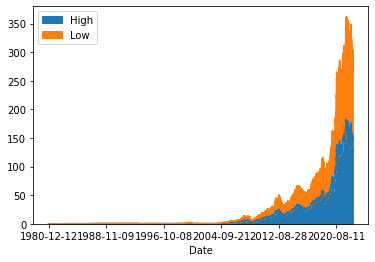

In [15]:
df.plot.area(x="Date", y=["High", "Low"])    
plt.show()
# Displays the plot (might open in an exterior Python window)

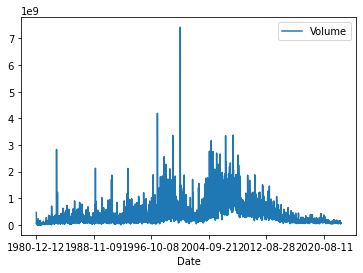

In [14]:
df.plot.line(x="Date", y=["Volume"])    
plt.show()
# Displays the plot (might open in an exterior Python window)

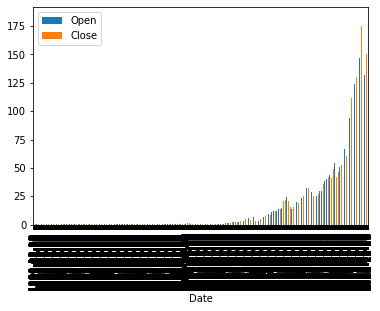

In [22]:
df.plot.bar(x="Date", y=["Open", "Close"])    
plt.show()
# Displays the plot (might open in an exterior Python window)